In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 158MB/s]


In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:

!wget 'https://live.staticflickr.com/4238/34598338584_f40017c704_b.jpg'

--2023-04-15 17:43:47--  https://live.staticflickr.com/4238/34598338584_f40017c704_b.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 18.160.38.87, 2600:9000:24f2:8000:0:5a51:64c9:c681, 2600:9000:24f2:8e00:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|18.160.38.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘34598338584_f40017c704_b.jpg’

34598338584_f40017c     [ <=>                ] 221.28K  --.-KB/s    in 0.01s   

2023-04-15 17:43:47 (19.5 MB/s) - ‘34598338584_f40017c704_b.jpg’ saved [226586]



In [ ]:
ig = Image.open("/content/34598338584_f40017c704_b.jpg")

In [ ]:
transform = T.ToTensor()
img = transform(ig)

In [ ]:
with torch.no_grad():
  pred = model([img])

In [ ]:
pred

[{'boxes': tensor([[5.2575e+02, 4.4187e+02, 6.8755e+02, 6.3433e+02],
          [2.7942e+02, 4.1218e+02, 3.7457e+02, 5.5601e+02],
          [7.0308e+02, 3.5646e+02, 8.3216e+02, 4.5579e+02],
          [9.7924e+01, 3.3992e+02, 1.8763e+02, 3.8690e+02],
          [4.2691e+02, 3.9810e+02, 5.1008e+02, 5.1203e+02],
          [8.1690e+02, 3.6339e+02, 9.0895e+02, 4.6182e+02],
          [5.1912e+02, 3.9468e+02, 6.0944e+02, 4.4257e+02],
          [7.9784e+02, 5.1912e+02, 1.0105e+03, 6.7723e+02],
          [1.5426e+02, 4.8284e+02, 2.1879e+02, 5.1814e+02],
          [8.6434e+02, 4.5747e+02, 9.0269e+02, 4.8745e+02],
          [5.6940e+02, 4.2058e+02, 6.5566e+02, 4.5282e+02],
          [6.7268e+01, 5.3801e+02, 2.8361e+02, 6.7654e+02],
          [7.4993e+02, 4.1387e+02, 8.4460e+02, 6.4207e+02],
          [8.9243e+02, 4.5132e+02, 9.2751e+02, 4.8038e+02],
          [1.1851e+02, 3.6406e+02, 2.2517e+02, 5.5799e+02],
          [0.0000e+00, 3.8647e+02, 1.5813e+02, 6.7062e+02],
          [1.9803e+02, 2.9595e+

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes , labels , scores = pred[0]["boxes"] , pred[0]["labels"] , pred[0]["scores"]

In [ ]:
num = torch.argwhere(scores >0.9).shape[0]

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
num

9

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
igg = cv2.imread("/content/34598338584_f40017c704_b.jpg")
for i in range(num):
  x1,y1,x2,y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.rectangle(igg , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 1)
  igg = cv2.putText(igg , class_name , (x1 , y1 -10) , font , 0.6,(255,0,0) , 1 , cv2.LINE_AA)

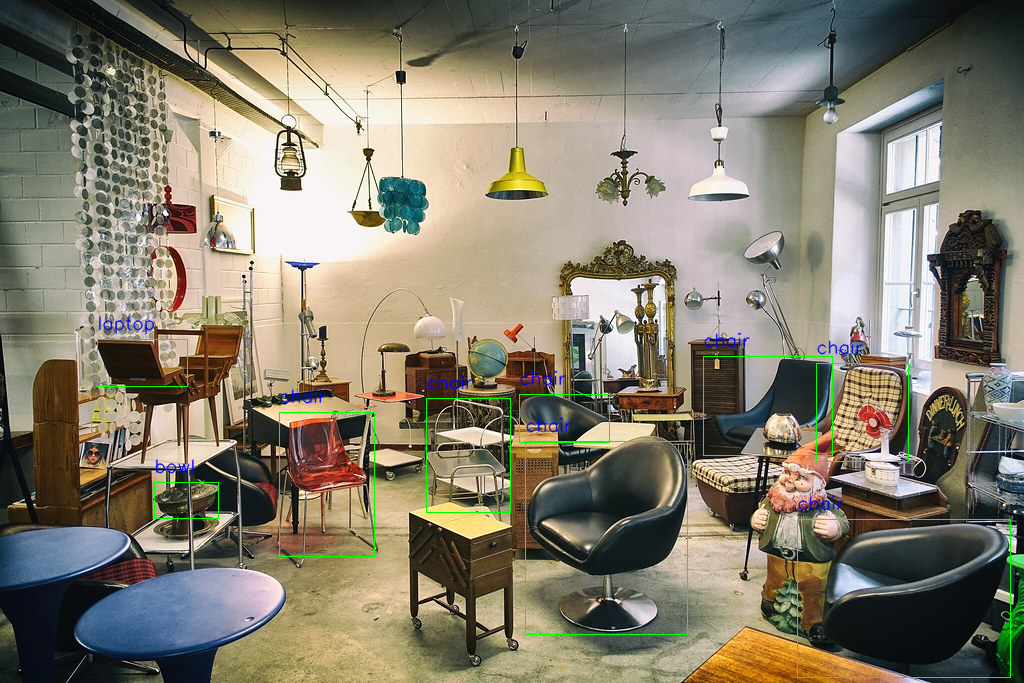

In [ ]:
cv2_imshow(igg)

In [ ]:
labels

tensor([62, 62, 62, 73, 62, 62, 62, 62, 51, 47, 62, 62,  1, 47, 62, 62, 64, 62,
        67, 62, 64, 62, 67, 67, 62, 64, 62, 62, 62, 62, 37, 62, 62, 84, 67, 86,
         1, 62, 64, 62, 62, 62, 62, 62, 67, 67, 73, 15, 62, 67, 62, 67, 88, 86,
        62, 46, 62, 62, 84, 31, 67, 62, 67, 62, 62, 85, 67, 67, 62, 64, 62, 62,
        51, 88, 62, 67, 62, 62, 62, 62, 67, 67, 31, 67, 62, 62, 62, 64, 62, 62,
        62, 62, 63, 62, 47, 31, 46, 86, 62, 67])